In [1]:
import time
import random
import matplotlib.pyplot as plt

## Partie 1 : algorithmes naifs

In [2]:
def extraire(fichier):
    """Renvoie le contenu d'un fichier texte avec un entier par ligne
    sous la forme d'un tableau"""
    f = open(fichier)
    tab = [int(ligne) for ligne in f]
    f.close()
    return tab

In [3]:
def somme(tab):
    """Renvoie la somme des éléments du tableau tab"""
    s = 0
    for e in tab:
        s = s + e
    return s

In [5]:
tab_1K = extraire('1Kints.txt')
tab_2K = extraire('2Kints.txt')
tab_4K = extraire('4Kints.txt')

FileNotFoundError: [Errno 2] No such file or directory: '1Kints.txt'

In [5]:
somme(tab_1K), somme(tab_2K), somme(tab_4K)

(1277931, 28383875, 6388500)

In [6]:
assert (somme(tab_1K), somme(tab_2K), somme(tab_4K)) == (1277931, 28383875, 6388500)

In [16]:
help(time.perf_counter)

Help on built-in function perf_counter in module time:

perf_counter(...)
    perf_counter() -> float
    
    Performance counter for benchmarking.



In [4]:
def deux_sommes(tab):
    """Renvoie un couple :
    - le nombre de couples d'entiers dont la somme est égale à 0 dans le tableau d'entiers tab
    - le temps d'exécution
    """
    n = len(tab)
    debut = time.perf_counter()
    c = 0
    for i in range(n):
        for j in range(i + 1, n):
            if tab[i] + tab[j] == 0:
                c = c + 1
    fin = time.perf_counter()
    return (c, fin - debut)


assert deux_sommes(tab_1K)[0] == 1
assert deux_sommes(tab_2K)[0] == 2
assert deux_sommes(tab_4K)[0] == 3

NameError: name 'tab_1K' is not defined

In [48]:
def trois_sommes(tab):
    """Renvoie un couple :
    - le nombre de triplets d'entiers dont la somme est égale à 0 dans le tableau d'entiers tab
    - le temps d'exécution
    """
    n = len(tab)
    debut = time.perf_counter()
    c = 0
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                if tab[i] + tab[j] + tab[k] == 0:
                    c = c + 1
    return (c, time.perf_counter() - debut)

#assert trois_sommes(tab_1K)[0] == 70
#assert trois_sommes(tab_2K)[0] == 528
#assert trois_sommes(tab_4K)[0] == 4039

In [28]:
trois_sommes(tab_1K)

(70, 25.274246467997727)

In [24]:
tab_1K = extraire('1Kints.txt')
tab_2K = extraire('2Kints.txt')
tab_4K = extraire('4Kints.txt')

In [50]:
deux_sommes(tab_1K)

(1, 0.059311490003892686)

In [51]:
deux_sommes(tab_2K)

(2, 0.2185973629966611)

In [52]:
deux_sommes(tab_4K)

(3, 0.8890003500055172)

~~~
fjunier@fjunier:~/NSI/CapesNSI/Formation-2020-2021$ java TwoSum 1Kints.txt 
elapsed time = 0.005
1
fjunier@fjunier:~/NSI/CapesNSI/Formation-2020-2021$ java TwoSum 2Kints.txt 
elapsed time = 0.012
2
fjunier@fjunier:~/NSI/CapesNSI/Formation-2020-2021$ java TwoSum 4Kints.txt 
elapsed time = 0.028
3
~~~

In [21]:
trois_sommes(tab_1K)

(70, 24.519599667000875)

In [22]:
trois_sommes(tab_2K)

(528, 197.62161271900186)

In [ ]:
trois_sommes(tab_4K)

In [5]:
def generer_tab_aleatoire(n, binf, bsup):
    """Renvoie un tableau de taille n
    d'entiers aléatoires entre binf et bsup"""
    return [random.randint(binf, bsup) for _ in range(n)]    

In [6]:
def testDoublement(nstart, nbiter, recherche, debug = True):
    n = nstart
    ttaille = []
    ttemps = []
    MAX = 1000000
    for _ in range(nbiter):
        tab =  generer_tab_aleatoire(n, -MAX, MAX)
        compte, temps = recherche(tab)
        ttaille.append(n)
        ttemps.append(temps)
        if debug:
            print(f"Taille = {n} --> Temps = {temps:.3e} s")
        n = n * 2        
    return ttemps, ttaille   


def testDoublementWhile(nstart, recherche, temps_max, debug = True):
    n = nstart
    ttaille = []
    ttemps = []
    temps = 0
    MAX = 1000000
    while temps < temps_max:
        tab =  generer_tab_aleatoire(n, -MAX, MAX)
        compte, temps = recherche(tab)
        ttaille.append(n)
        ttemps.append(temps)
        if debug:
            print(f"Taille = {n} --> Temps = {temps:.3e} s")
        n = n * 2        
    return ttemps, ttaille        

In [11]:
ttemps, ttaille = testDoublement(1, 11, trois_sommes)

Taille = 1 --> Temps = 1.620e-06 s
Taille = 2 --> Temps = 2.580e-06 s
Taille = 4 --> Temps = 5.133e-06 s
Taille = 8 --> Temps = 1.896e-05 s
Taille = 16 --> Temps = 1.132e-04 s
Taille = 32 --> Temps = 8.155e-04 s
Taille = 64 --> Temps = 9.146e-03 s
Taille = 128 --> Temps = 5.744e-02 s
Taille = 256 --> Temps = 3.952e-01 s
Taille = 512 --> Temps = 3.290e+00 s
Taille = 1024 --> Temps = 2.600e+01 s


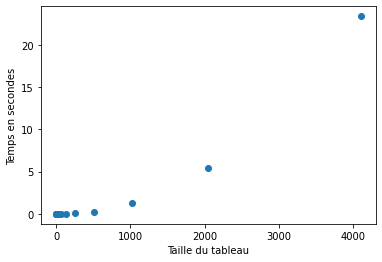

In [114]:
%matplotlib inline

def graphique(tx,ty, fichier):
    plt.xlabel('Taille du tableau')
    plt.ylabel('Temps en secondes')
    plt.plot(tx, ty, 'o')
    plt.savefig(fichier)
    plt.show()
    
graphique(ttaille, ttemps, 'testDoublement.png')

In [65]:
ttemps, ttaille = testDoublement(1, 11, deux_sommes)

1 2.262997440993786e-06
2 4.391004040371627e-06
4 6.2780018197372556e-06
8 8.805000106804073e-06
16 2.332199801458046e-05
32 7.445899973390624e-05
64 0.00027598800079431385
128 0.001091805002943147
256 0.004193783999653533
512 0.016943690003245138
1024 0.057171129003108945


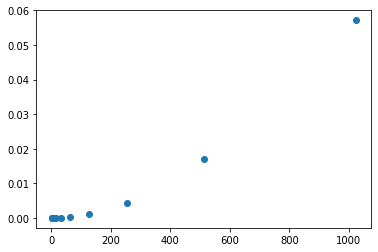

In [66]:
%matplotlib inline

def graphique(tx,ty, fichier):
    plt.plot(tx, ty, 'o')
    plt.savefig(fichier)
    plt.show()
    
graphique(ttaille, ttemps, 'testDoublement.png')

In [12]:
def testDoublementRatio(nstart, nbiter, recherche, debug = True):
    MAX = 1000000
    n = nstart
    ttaille = []
    ttemps = []
    tratio = []
    tab =  generer_tab_aleatoire(n, -MAX, MAX)
    compte, temps = recherche(tab)
    ttaille.append(n)
    ttemps.append(temps)    
    for k in range(nbiter - 1):
        n = n * 2 
        tab =  generer_tab_aleatoire(n, -MAX, MAX)
        compte, temps = recherche(tab)
        ratio = temps/ttemps[k]
        ttaille.append(n)
        ttemps.append(temps)
        tratio.append(ratio)
        if debug:
            print(f"Taille = {n} --> Temps = {temps:.3e} s --> Ratio = {ratio:.3e}")             
    return ttemps, ttaille, tratio  

In [15]:
ttemps, ttaille, tratio = testDoublementRatio(1, 11, trois_sommes)

Taille = 2 --> Temps = 2.987e-06 s --> Ratio = 1.035e+00
Taille = 4 --> Temps = 1.102e-05 s --> Ratio = 3.689e+00
Taille = 8 --> Temps = 3.040e-05 s --> Ratio = 2.759e+00
Taille = 16 --> Temps = 1.151e-04 s --> Ratio = 3.785e+00
Taille = 32 --> Temps = 8.020e-04 s --> Ratio = 6.969e+00
Taille = 64 --> Temps = 6.146e-03 s --> Ratio = 7.663e+00
Taille = 128 --> Temps = 4.939e-02 s --> Ratio = 8.036e+00
Taille = 256 --> Temps = 3.730e-01 s --> Ratio = 7.554e+00
Taille = 512 --> Temps = 3.267e+00 s --> Ratio = 8.758e+00
Taille = 1024 --> Temps = 2.663e+01 s --> Ratio = 8.152e+00


Vérification que temps ~ taille$^{3}$ pour `trois_sommes`

In [17]:
[temps / taille ** 3 for (temps, taille) in zip(ttemps, ttaille)]

[2.8849972295574844e-06,
 3.7337485991884023e-07,
 1.7218746961589204e-07,
 5.9384760220382304e-08,
 2.8096923898601744e-08,
 2.4476318305488576e-08,
 2.3444522850857297e-08,
 2.3549214363260962e-08,
 2.2235121726905255e-08,
 2.4343040287472164e-08,
 2.480568304192107e-08]

In [20]:
ttemps, ttaille, tratio = testDoublementRatio(1, 14, deux_sommes)

Taille = 2 --> Temps = 1.969e-06 s --> Ratio = 1.123e+00
Taille = 4 --> Temps = 4.472e-06 s --> Ratio = 2.271e+00
Taille = 8 --> Temps = 6.939e-06 s --> Ratio = 1.552e+00
Taille = 16 --> Temps = 1.833e-05 s --> Ratio = 2.642e+00
Taille = 32 --> Temps = 5.848e-05 s --> Ratio = 3.191e+00
Taille = 64 --> Temps = 2.094e-04 s --> Ratio = 3.581e+00
Taille = 128 --> Temps = 8.295e-04 s --> Ratio = 3.961e+00
Taille = 256 --> Temps = 3.303e-03 s --> Ratio = 3.982e+00
Taille = 512 --> Temps = 1.609e-02 s --> Ratio = 4.871e+00
Taille = 1024 --> Temps = 6.093e-02 s --> Ratio = 3.787e+00
Taille = 2048 --> Temps = 2.531e-01 s --> Ratio = 4.154e+00
Taille = 4096 --> Temps = 9.618e-01 s --> Ratio = 3.800e+00
Taille = 8192 --> Temps = 3.697e+00 s --> Ratio = 3.844e+00


Vérification que temps ~ taille$^{2}$ pour `deux_sommes`

In [21]:
[temps / taille ** 2 for (temps, taille) in zip(ttemps, ttaille)]

[1.7540005501359701e-06,
 4.922512744087726e-07,
 2.795000000332948e-07,
 1.0842188657989027e-07,
 7.160156201280188e-08,
 5.711230954830171e-08,
 5.1132323264369006e-08,
 5.063116459425032e-08,
 5.040356454433237e-08,
 6.138133620825492e-08,
 5.810903168368409e-08,
 6.033925533353857e-08,
 5.732486861934061e-08,
 5.5084594309312215e-08]

## Tests avec Java

Sitographie :

* Librairies : <https://introcs.cs.princeton.edu/java/stdlib/>
* Programmes : <https://algs4.cs.princeton.edu/14analysis/>

~~~
fjunier@fjunier:~/NSI/CapesNSI/Formation-2020-2021$ java DoublingTest
    250   0.0
    500   0.0
   1000   0.3
   2000   2.3
   4000  18.7
   8000 152.3
~~~

~~~
fjunier@fjunier:~/NSI/CapesNSI/Formation-2020-2021$ java DoublingRatio
   250     0.0   1.4
   500     0.0   5.4
  1000     0.3   7.6
  2000     2.3   7.9
  4000    18.2   8.0
~~~

## Partie 2 : algorithmes avec recherche dichotomique


Pour simplifier on suppose que tous les éléments sont distincts

In [31]:
def tous_distincts(tab):
    """Fonction qui renvoie un booléen 
    indiquant si tous les éléments de tab sont distincts"""
    n = len(tab)
    for i in range(n):
        for j in range(i + 1, n):
            if tab[i] == tab[j]:
                return False
    return True

assert tous_distincts(list(range(1, 100, random.randint(1, 10))))
assert not tous_distincts([random.randint(1, 6) for _ in range(20)])

def generer_tab_aleatoire_distincts(n, binf, bsup):
    """Renvoie un tableau de taille n qui est un échantillon
    d'entiers aléatoires entre binf et bsup
    Postcondition : tous les éléments doivent être distincts"""
    urne = list(range(binf, bsup + 1))
    echantillon = []
    for _ in range(n):
        choix = urne.pop(random.randint(0, len(urne) - 1))
        echantillon.append(choix)
    return echantillon

for n in [10, 50, 100, 1000]:
    assert tous_distincts(generer_tab_aleatoire_distincts(100, -1000, 1000))

In [38]:
def testDoublement2(nstart, nbiter, recherche, generateur_aleatoire, debug = True):
    n = nstart
    ttaille = []
    ttemps = []
    MAX = 1000000
    for _ in range(nbiter):
        tab =  generateur_aleatoire(n, -MAX, MAX)
        compte, temps = recherche(tab)
        ttaille.append(n)
        ttemps.append(temps)
        if debug:
            print(f"Taille = {n} --> Temps = {temps:.3e} s")
        n = n * 2        
    return ttemps, ttaille   


def testDoublementRatio2(nstart, nbiter, recherche,  generateur_aleatoire, debug = True):
    MAX = 1000000
    n = nstart
    ttaille = []
    ttemps = []
    tratio = []
    tab =  generateur_aleatoire(n, -MAX, MAX)
    compte, temps = recherche(tab)
    ttaille.append(n)
    ttemps.append(temps)    
    for k in range(nbiter - 1):
        n = n * 2 
        tab =  generateur_aleatoire(n, -MAX, MAX)
        compte, temps = recherche(tab)
        ratio = temps/ttemps[k]
        ttaille.append(n)
        ttemps.append(temps)
        tratio.append(ratio)
        if debug:
            print(f"Taille = {n} --> Temps = {temps:.3e} s --> Ratio = {ratio:.3e}")             
    return ttemps, ttaille, tratio  

In [42]:
ttemps, ttaille = testDoublement2(1, 14, deux_sommes2, generer_tab_aleatoire_distincts)

Taille = 1 --> Temps = 1.215e-05 s
Taille = 2 --> Temps = 1.551e-05 s
Taille = 4 --> Temps = 1.888e-05 s
Taille = 8 --> Temps = 2.157e-05 s
Taille = 16 --> Temps = 3.520e-05 s
Taille = 32 --> Temps = 8.127e-05 s
Taille = 64 --> Temps = 2.733e-04 s
Taille = 128 --> Temps = 9.489e-04 s
Taille = 256 --> Temps = 3.855e-03 s
Taille = 512 --> Temps = 1.858e-02 s
Taille = 1024 --> Temps = 8.450e-02 s
Taille = 2048 --> Temps = 3.698e-01 s
Taille = 4096 --> Temps = 1.566e+00 s
Taille = 8192 --> Temps = 6.234e+00 s


In [43]:
ttemps, ttaille, tratio = testDoublementRatio2(1, 14, deux_sommes2,  generer_tab_aleatoire_distincts)

Taille = 2 --> Temps = 1.177e-05 s --> Ratio = 1.064e+00
Taille = 4 --> Temps = 2.145e-05 s --> Ratio = 1.822e+00
Taille = 8 --> Temps = 1.514e-05 s --> Ratio = 7.060e-01
Taille = 16 --> Temps = 3.175e-05 s --> Ratio = 2.097e+00
Taille = 32 --> Temps = 7.865e-05 s --> Ratio = 2.477e+00
Taille = 64 --> Temps = 2.623e-04 s --> Ratio = 3.335e+00
Taille = 128 --> Temps = 9.313e-04 s --> Ratio = 3.550e+00
Taille = 256 --> Temps = 3.796e-03 s --> Ratio = 4.076e+00
Taille = 512 --> Temps = 1.803e-02 s --> Ratio = 4.749e+00
Taille = 1024 --> Temps = 8.086e-02 s --> Ratio = 4.486e+00
Taille = 2048 --> Temps = 3.596e-01 s --> Ratio = 4.447e+00
Taille = 4096 --> Temps = 1.504e+00 s --> Ratio = 4.182e+00
Taille = 8192 --> Temps = 6.086e+00 s --> Ratio = 4.047e+00


In [49]:
ttemps, ttaille, tratio = testDoublementRatio2(1, 14, deux_sommes,  generer_tab_aleatoire)

Taille = 2 --> Temps = 1.996e-06 s --> Ratio = 1.100e+00
Taille = 4 --> Temps = 3.612e-06 s --> Ratio = 1.810e+00
Taille = 8 --> Temps = 6.793e-06 s --> Ratio = 1.881e+00
Taille = 16 --> Temps = 1.765e-05 s --> Ratio = 2.599e+00
Taille = 32 --> Temps = 5.759e-05 s --> Ratio = 3.263e+00
Taille = 64 --> Temps = 2.111e-04 s --> Ratio = 3.665e+00
Taille = 128 --> Temps = 8.265e-04 s --> Ratio = 3.915e+00
Taille = 256 --> Temps = 5.524e-03 s --> Ratio = 6.684e+00
Taille = 512 --> Temps = 1.840e-02 s --> Ratio = 3.330e+00
Taille = 1024 --> Temps = 6.171e-02 s --> Ratio = 3.354e+00
Taille = 2048 --> Temps = 2.529e-01 s --> Ratio = 4.098e+00
Taille = 4096 --> Temps = 9.745e-01 s --> Ratio = 3.853e+00
Taille = 8192 --> Temps = 3.674e+00 s --> Ratio = 3.770e+00


In [20]:
def recherche_seq(tab, element):
    """Recherche séquentielle d'un élément dans un tableau :
    - Renvoie  l'index de la première occurence
    - ou -1 si l'élément n'est pas dans le tableau
    """
    for k in range(len(tab)):
        if tab[k] == element:
            return k
    return -1

def deux_sommes2(tab):
    """Renvoie un couple :
    - le nombre de couples d'entiers dont la somme est égale à 0 dans le tableau d'entiers tab
    - le temps d'exécution
    Précondition : tous les éléments de tab doivent être distincts
    """
    assert tous_distincts(tab)
    n = len(tab)
    debut = time.perf_counter()
    c = 0
    for i in range(n):
        if recherche_seq(tab, -tab[i]) > i:
            c = c + 1
    fin = time.perf_counter()
    return (c, fin - debut)

In [22]:
for tab in [tab_1K, tab_2K, tab_4K]:
    assert tous_distincts(tab)

In [55]:
def recherche_dicho(tab, element):
    """Recherche l'entier element dans le tableau d'entiers tab
    Précondition : tab trié dans l'ordre croissant
    Si element est dans tab renvoie son index
    Sinon renvoie -1"""
    debut = 0
    fin = len(tab) - 1
    while debut <= fin:
        med = (debut + fin) // 2
        if element < tab[med]:
            fin = med - 1
        elif element > tab[med]:
            debut = med + 1
        else:
            return med
    return -1

In [54]:
def tri_selection(tab):
    """Tri par sélection en place du tableau tab"""
    n = len(tab)
    for i in range(n - 1):
        imin = i
        for j in range(i + 1, n):
            if t[j] < t[imin]:
                imin = j
        t[i], t[imin] = t[imin], t[i]

In [52]:
def tri_insertion(tab):
    """Tri par insertion en place du tableau tab"""
    n = len(tab)
    for i in range(1, n):
        j = i - 1
        element = tab[i]
        while j >= 0 and tab[j] > element:
            tab[j+1] = tab[j]
            j =  j - 1
        tab[j + 1] = element

In [51]:
def deux_sommes_rapide(tab):
    """Renvoie le nombre de couples d'entiers dans un tableau
    dont la somme est égale à 0
    Précondition : tous les entiers sont distints"""
    n = len(tab)
    debut = time.perf_counter()
    tri_insertion(tab)
    c = 0
    for i in range(n):
        if recherche_dicho(tab, -tab[i]) > i:
            c = c + 1
    return (c, time.perf_counter() - debut)

In [56]:
ttemps, ttaille = testDoublement2(1, 15, deux_sommes_rapide, generer_tab_aleatoire_distincts)

Taille = 1 --> Temps = 2.206e-05 s
Taille = 2 --> Temps = 1.779e-05 s
Taille = 4 --> Temps = 2.491e-05 s
Taille = 8 --> Temps = 3.283e-05 s
Taille = 16 --> Temps = 4.450e-05 s
Taille = 32 --> Temps = 1.186e-04 s
Taille = 64 --> Temps = 3.073e-04 s
Taille = 128 --> Temps = 8.956e-04 s
Taille = 256 --> Temps = 2.755e-03 s
Taille = 512 --> Temps = 1.201e-02 s
Taille = 1024 --> Temps = 4.649e-02 s
Taille = 2048 --> Temps = 1.832e-01 s
Taille = 4096 --> Temps = 7.480e-01 s
Taille = 8192 --> Temps = 3.011e+00 s
Taille = 16384 --> Temps = 1.210e+01 s


In [59]:
ttemps, ttaille, tratio = testDoublementRatio2(1, 15, deux_sommes_rapide,  generer_tab_aleatoire)

Taille = 2 --> Temps = 3.338e-06 s --> Ratio = 7.763e-01
Taille = 4 --> Temps = 8.240e-06 s --> Ratio = 2.469e+00
Taille = 8 --> Temps = 1.268e-05 s --> Ratio = 1.539e+00
Taille = 16 --> Temps = 4.130e-05 s --> Ratio = 3.257e+00
Taille = 32 --> Temps = 9.214e-05 s --> Ratio = 2.231e+00
Taille = 64 --> Temps = 3.068e-04 s --> Ratio = 3.330e+00
Taille = 128 --> Temps = 8.980e-04 s --> Ratio = 2.927e+00
Taille = 256 --> Temps = 3.096e-03 s --> Ratio = 3.448e+00
Taille = 512 --> Temps = 1.311e-02 s --> Ratio = 4.235e+00
Taille = 1024 --> Temps = 5.042e-02 s --> Ratio = 3.846e+00
Taille = 2048 --> Temps = 1.842e-01 s --> Ratio = 3.654e+00
Taille = 4096 --> Temps = 7.385e-01 s --> Ratio = 4.008e+00
Taille = 8192 --> Temps = 2.977e+00 s --> Ratio = 4.030e+00
Taille = 16384 --> Temps = 1.196e+01 s --> Ratio = 4.018e+00


In [61]:
def deux_sommes_rapide2(tab):
    """Renvoie le nombre de couples d'entiers dans un tableau
    dont la somme est égale à 0
    Précondition : tous les entiers sont distints"""
    n = len(tab)
    debut = time.perf_counter()
    tab.sort()
    c = 0
    for i in range(n):
        if recherche_dicho(tab, -tab[i]) > i:
            c = c + 1
    return (c, time.perf_counter() - debut)

In [62]:
ttemps, ttaille = testDoublement2(1, 15, deux_sommes_rapide2, generer_tab_aleatoire_distincts)

Taille = 1 --> Temps = 2.209e-05 s
Taille = 2 --> Temps = 1.453e-05 s
Taille = 4 --> Temps = 1.672e-05 s
Taille = 8 --> Temps = 1.827e-05 s
Taille = 16 --> Temps = 3.199e-05 s
Taille = 32 --> Temps = 5.772e-05 s
Taille = 64 --> Temps = 1.042e-04 s
Taille = 128 --> Temps = 2.313e-04 s
Taille = 256 --> Temps = 5.039e-04 s
Taille = 512 --> Temps = 1.129e-03 s
Taille = 1024 --> Temps = 2.504e-03 s
Taille = 2048 --> Temps = 5.552e-03 s
Taille = 4096 --> Temps = 1.163e-02 s
Taille = 8192 --> Temps = 2.558e-02 s
Taille = 16384 --> Temps = 5.820e-02 s


In [64]:
ttemps, ttaille, tratio = testDoublementRatio2(1, 15, deux_sommes_rapide2,  generer_tab_aleatoire_distincts)

Taille = 2 --> Temps = 2.115e-05 s --> Ratio = 1.345e+00
Taille = 4 --> Temps = 2.108e-05 s --> Ratio = 9.965e-01
Taille = 8 --> Temps = 2.451e-05 s --> Ratio = 1.163e+00
Taille = 16 --> Temps = 3.281e-05 s --> Ratio = 1.339e+00
Taille = 32 --> Temps = 5.882e-05 s --> Ratio = 1.793e+00
Taille = 64 --> Temps = 1.143e-04 s --> Ratio = 1.943e+00
Taille = 128 --> Temps = 2.290e-04 s --> Ratio = 2.004e+00
Taille = 256 --> Temps = 4.905e-04 s --> Ratio = 2.142e+00
Taille = 512 --> Temps = 1.134e-03 s --> Ratio = 2.312e+00
Taille = 1024 --> Temps = 2.444e-03 s --> Ratio = 2.155e+00
Taille = 2048 --> Temps = 5.352e-03 s --> Ratio = 2.190e+00
Taille = 4096 --> Temps = 1.161e-02 s --> Ratio = 2.170e+00
Taille = 8192 --> Temps = 2.499e-02 s --> Ratio = 2.152e+00
Taille = 16384 --> Temps = 5.382e-02 s --> Ratio = 2.153e+00


In [66]:
def trois_sommes_rapide(tab):
    """Renvoie le nombre de triplets d'entiers dans un tableau
    dont la somme est égale à 0.
    Précondition : tous les entiers sont distints"""
    n = len(tab)
    debut = time.perf_counter()
    tri_insertion(tab)
    c = 0
    for i in range(n):
        for j in range(i + 1, n):
            if recherche_dicho(tab, -(tab[i] + tab[j])) > j:
                    c = c + 1
    return (c, time.perf_counter() - debut)

In [67]:
def trois_sommes_rapide2(tab):
    """Renvoie le nombre de triplets d'entiers dans un tableau
    dont la somme est égale à 0.
    Précondition : tous les entiers sont distints"""
    n = len(tab)
    debut = time.perf_counter()
    tab.sort()
    c = 0
    for i in range(n):
        for j in range(i + 1, n):
            if recherche_dicho(tab, -(tab[i] + tab[j])) > j:
                    c = c + 1
    return (c, time.perf_counter() - debut)

In [69]:
ttemps, ttaille, tratio = testDoublementRatio2(1, 12, trois_sommes_rapide,  generer_tab_aleatoire_distincts)

Taille = 2 --> Temps = 2.053e-05 s --> Ratio = 1.619e+00
Taille = 4 --> Temps = 3.483e-05 s --> Ratio = 1.697e+00
Taille = 8 --> Temps = 6.153e-05 s --> Ratio = 1.766e+00
Taille = 16 --> Temps = 1.632e-04 s --> Ratio = 2.652e+00
Taille = 32 --> Temps = 6.877e-04 s --> Ratio = 4.214e+00
Taille = 64 --> Temps = 3.124e-03 s --> Ratio = 4.542e+00
Taille = 128 --> Temps = 1.384e-02 s --> Ratio = 4.431e+00
Taille = 256 --> Temps = 6.105e-02 s --> Ratio = 4.410e+00
Taille = 512 --> Temps = 2.885e-01 s --> Ratio = 4.726e+00
Taille = 1024 --> Temps = 1.262e+00 s --> Ratio = 4.373e+00
Taille = 2048 --> Temps = 5.558e+00 s --> Ratio = 4.405e+00


In [71]:
ttemps, ttaille = testDoublement2(1, 12, trois_sommes_rapide2,  generer_tab_aleatoire_distincts)

Taille = 1 --> Temps = 1.076e-05 s
Taille = 2 --> Temps = 3.247e-05 s
Taille = 4 --> Temps = 3.945e-05 s
Taille = 8 --> Temps = 5.604e-05 s
Taille = 16 --> Temps = 1.428e-04 s
Taille = 32 --> Temps = 6.318e-04 s
Taille = 64 --> Temps = 2.930e-03 s
Taille = 128 --> Temps = 1.380e-02 s
Taille = 256 --> Temps = 5.852e-02 s
Taille = 512 --> Temps = 2.925e-01 s
Taille = 1024 --> Temps = 1.276e+00 s
Taille = 2048 --> Temps = 5.555e+00 s
